In [34]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import pywt

In [55]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [56]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

In [57]:
wavelet = pywt.Wavelet('db1')

In [59]:
print(wavelet)

Wavelet db1
  Family name:    Daubechies
  Short name:     db
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [60]:
camera = pywt.data.camera()

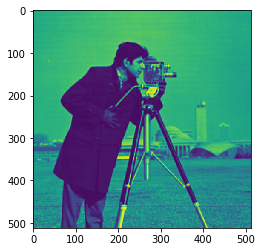

In [62]:
plt.imshow(camera)

In [64]:
w = pywt.Wavelet('db1')
print(w)

Wavelet db1
  Family name:    Daubechies
  Short name:     db
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [65]:
def print_array(arr):
    print("[%s]" % ", ".join(["%.14f" % x for x in arr]))

In [74]:
w.filter_bank == (w.dec_lo, w.dec_hi, w.rec_lo, w.rec_hi)

True

In [77]:
print(w.dec_hi)
print(w.dec_len)
w.dec_len

[-0.7071067811865476, 0.7071067811865476]
2


2

In [82]:
x = [3, 7, 1, 1, -2, 5, 4, 6]
cA, cD = pywt.dwt(x,'db2')
print('Original:',x)
print(cA)
print(cD)
x1 = pywt.idwt(cA,cD,'db2')
print('Reconstructed:',x1)

Original: [3, 7, 1, 1, -2, 5, 4, 6]
[5.65685425 7.39923721 0.22414387 3.33677403 7.77817459]
[-2.44948974 -1.60368225 -4.44140056 -0.41361256  1.22474487]
Reconstructed: [ 3.  7.  1.  1. -2.  5.  4.  6.]


In [91]:
x = np.array([[1,2,3,4,5,6,7,8]]*8,'d')
print('Original Data \n--------------\n',x)
wp = pywt.WaveletPacket2D(data=x,wavelet='db2',mode='symmetric')

Original Data 
--------------
 [[1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 2. 3. 4. 5. 6. 7. 8.]]


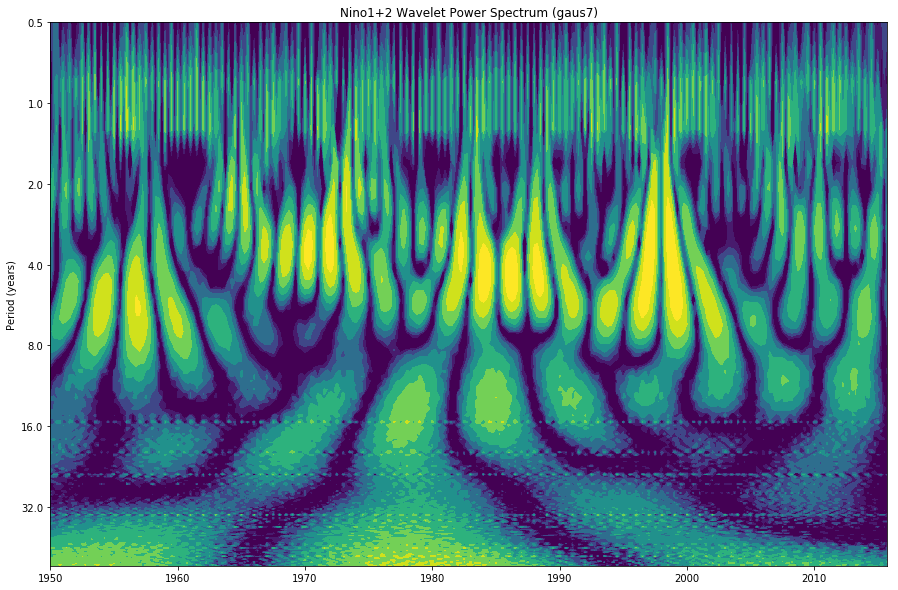

In [23]:
# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
wavelet = 'gaus7'
scales = np.arange(1, 128)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
power = (abs(cfs)) ** 2

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), np.log2(levels),
            extend='both')

ax.set_title('%s Wavelet Power Spectrum (%s)' % ('Nino1+2', wavelet))
ax.set_ylabel('Period (years)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -1)

plt.show()

In [36]:
image1 = '/Users/jm186072/Documents/DataScience/Udemy Courses/Fourier Transform/Lenna.png'


im        = Image.open(image1)
img_grey  = im.convert('L')


In [40]:
a = np.matrix(img_grey)

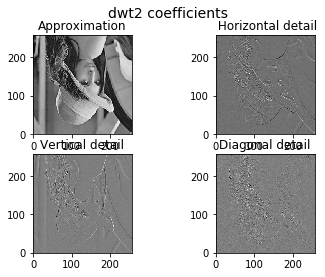

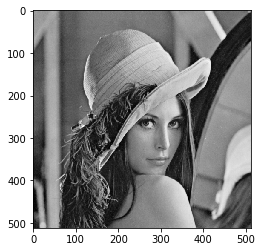

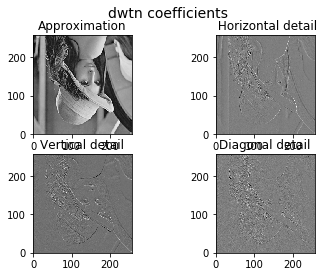

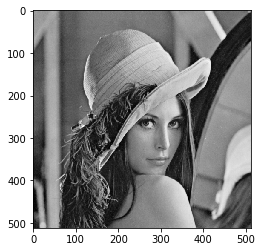

In [41]:

#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data

# Load image
#original = pywt.data.aero()
original= a
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure()
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(a, origin='image', interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=12)

fig.suptitle("dwt2 coefficients", fontsize=14)

# Now reconstruct and plot the original image
reconstructed = pywt.idwt2(coeffs2, 'bior1.3')
fig = plt.figure()
plt.imshow(reconstructed, interpolation="nearest", cmap=plt.cm.gray)

# Check that reconstructed image is close to the original
np.testing.assert_allclose(original, reconstructed, atol=1e-13, rtol=1e-13)


# Now do the same with dwtn/idwtn, to show the difference in their signatures

coeffsn = pywt.dwtn(original, 'bior1.3')
fig = plt.figure()
for i, key in enumerate(['aa', 'ad', 'da', 'dd']):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(coeffsn[key], origin='image', interpolation="nearest",
              cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=12)

fig.suptitle("dwtn coefficients", fontsize=14)

# Now reconstruct and plot the original image
reconstructed = pywt.idwtn(coeffsn, 'bior1.3')
fig = plt.figure()
plt.imshow(reconstructed, interpolation="nearest", cmap=plt.cm.gray)

# Check that reconstructed image is close to the original
np.testing.assert_allclose(original, reconstructed, atol=1e-13, rtol=1e-13)


plt.show()


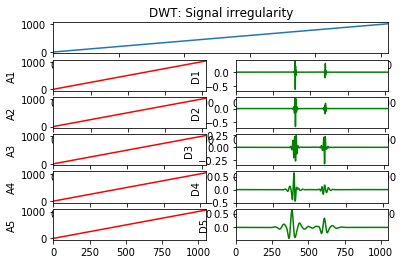

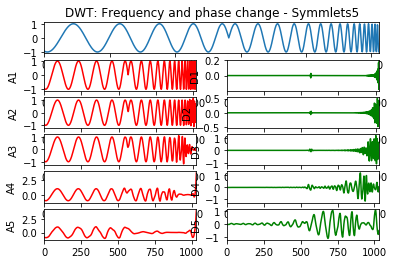

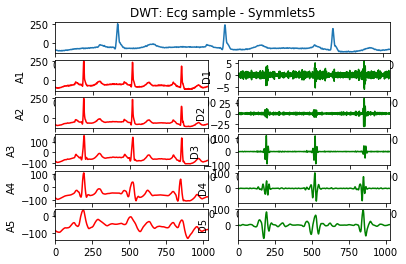

In [42]:
ecg = pywt.data.ecg()

data1 = np.concatenate((np.arange(1, 400),
                        np.arange(398, 600),
                        np.arange(601, 1024)))
x = np.linspace(0.082, 2.128, num=1024)[::-1]
data2 = np.sin(40 * np.log(x)) * np.sign((np.log(x)))

mode = pywt.Modes.smooth


def plot_signal_decomp(data, w, title):
    """Decompose and plot a signal S.
    S = An + Dn + Dn-1 + ... + D1
    """
    w = pywt.Wavelet(w)
    a = data
    ca = []
    cd = []
    for i in range(5):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        cd.append(d)

    rec_a = []
    rec_d = []

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))

    for i, coeff in enumerate(cd):
        coeff_list = [None, coeff] + [None] * i
        rec_d.append(pywt.waverec(coeff_list, w))

    fig = plt.figure()
    ax_main = fig.add_subplot(len(rec_a) + 1, 1, 1)
    ax_main.set_title(title)
    ax_main.plot(data)
    ax_main.set_xlim(0, len(data) - 1)

    for i, y in enumerate(rec_a):
        ax = fig.add_subplot(len(rec_a) + 1, 2, 3 + i * 2)
        ax.plot(y, 'r')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("A%d" % (i + 1))

    for i, y in enumerate(rec_d):
        ax = fig.add_subplot(len(rec_d) + 1, 2, 4 + i * 2)
        ax.plot(y, 'g')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("D%d" % (i + 1))


plot_signal_decomp(data1, 'coif5', "DWT: Signal irregularity")
plot_signal_decomp(data2, 'sym5',
                   "DWT: Frequency and phase change - Symmlets5")
plot_signal_decomp(ecg, 'sym5', "DWT: Ecg sample - Symmlets5")


plt.show()

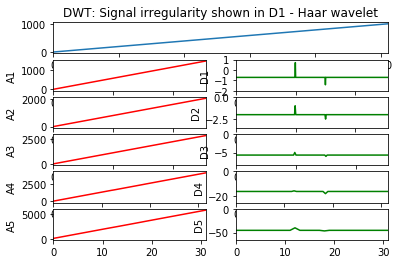

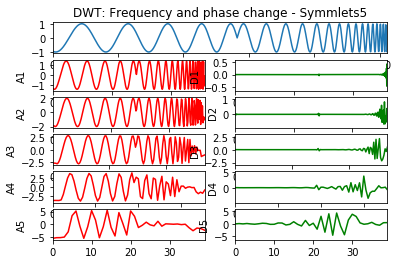

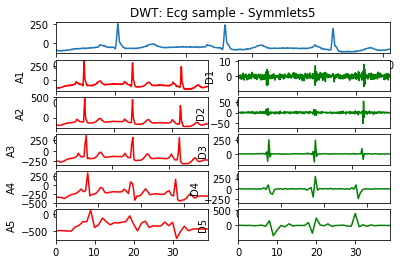

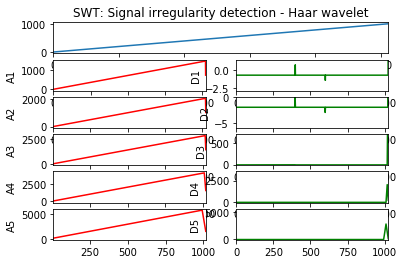

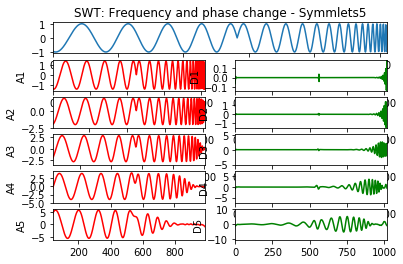

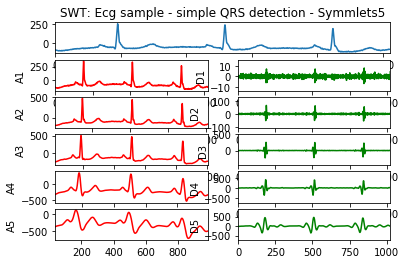

In [43]:
ecg = pywt.data.ecg()

data1 = np.concatenate((np.arange(1, 400),
                        np.arange(398, 600),
                        np.arange(601, 1024)))
x = np.linspace(0.082, 2.128, num=1024)[::-1]
data2 = np.sin(40 * np.log(x)) * np.sign((np.log(x)))

mode = pywt.Modes.sp1DWT = 1


def plot_coeffs(data, w, title, use_dwt=True):
    """Show dwt or swt coefficients for given data and wavelet."""
    w = pywt.Wavelet(w)
    a = data
    ca = []
    cd = []

    if use_dwt:
        for i in range(5):
            (a, d) = pywt.dwt(a, w, mode)
            ca.append(a)
            cd.append(d)
    else:
        coeffs = pywt.swt(data, w, 5)  # [(cA5, cD5), ..., (cA1, cD1)]
        for a, d in reversed(coeffs):
            ca.append(a)
            cd.append(d)

    fig = plt.figure()
    ax_main = fig.add_subplot(len(ca) + 1, 1, 1)
    ax_main.set_title(title)
    ax_main.plot(data)
    ax_main.set_xlim(0, len(data) - 1)

    for i, x in enumerate(ca):
        ax = fig.add_subplot(len(ca) + 1, 2, 3 + i * 2)
        ax.plot(x, 'r')
        ax.set_ylabel("A%d" % (i + 1))
        if use_dwt:
            ax.set_xlim(0, len(x) - 1)
        else:
            ax.set_xlim(w.dec_len * i, len(x) - 1 - w.dec_len * i)

    for i, x in enumerate(cd):
        ax = fig.add_subplot(len(cd) + 1, 2, 4 + i * 2)
        ax.plot(x, 'g')
        ax.set_ylabel("D%d" % (i + 1))
        # Scale axes
        ax.set_xlim(0, len(x) - 1)
        if use_dwt:
            ax.set_ylim(min(0, 1.4 * min(x)), max(0, 1.4 * max(x)))
        else:
            vals = x[w.dec_len * (1 + i):len(x) - w.dec_len * (1 + i)]
            ax.set_ylim(min(0, 2 * min(vals)), max(0, 2 * max(vals)))


# Show DWT coefficients
use_dwt = True
plot_coeffs(data1, 'db1',
            "DWT: Signal irregularity shown in D1 - Haar wavelet",
            use_dwt)
plot_coeffs(data2, 'sym5', "DWT: Frequency and phase change - Symmlets5",
            use_dwt)
plot_coeffs(ecg, 'sym5', "DWT: Ecg sample - Symmlets5", use_dwt)

# Show DWT coefficients
use_dwt = False
plot_coeffs(data1, 'db1', "SWT: Signal irregularity detection - Haar wavelet",
            use_dwt)
plot_coeffs(data2, 'sym5', "SWT: Frequency and phase change - Symmlets5",
            use_dwt)
plot_coeffs(ecg, 'sym5', "SWT: Ecg sample - simple QRS detection - Symmlets5",
            use_dwt)


plt.show()

In [52]:
import pywt.data as pp

In [53]:
pp.ecg

<function pywt.data._readers.ecg()>

In [45]:
#signals = pywt.data.demo_signal('list')
signals = pywt.data.demo_signal('list')
subplots_per_fig = 5
signal_length = 1024
i_fig = 0
n_figures = int(np.ceil(len(signals)/subplots_per_fig))
for i_fig in range(n_figures):
    # Select a subset of functions for the current plot
    func_subset = signals[
        i_fig * subplots_per_fig:(i_fig + 1) * subplots_per_fig]

    # create a figure to hold this subset of the functions
    fig, axes = plt.subplots(subplots_per_fig, 1)
    axes = axes.ravel()
    for n, signal in enumerate(func_subset):
        if signal in ['Gabor', 'sineoneoverx']:
            # user cannot specify a length for these two
            x = pywt.data.demo_signal(signal)
        else:
            x = pywt.data.demo_signal(signal, signal_length)
        ax = axes[n]
        ax.plot(x.real)
        if signal == 'Gabor':
            # The Gabor signal is complex-valued
            ax.plot(x.imag)
            ax.legend(['Gabor (Re)', 'Gabor (Im)'], loc='upper left')
        else:
            ax.legend([signal, ], loc='upper left')
    # omit axes for any unused subplots
    for n in range(n + 1, len(axes)):
        axes[n].set_axis_off()
plt.show()

AttributeError: module 'pywt.data' has no attribute 'demo_signal'